In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h3>使用資料: wine.csv</h3>

In [3]:
# Read data
df = pd.read_csv('E:\\淺度機器學習\\data\\wine.csv')
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1])


<h3>邏吉斯迴歸</h3>

In [ ]:
# Split data into training and testing data 7:3
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30) 
# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # 'lbfgs' is the default
# solver = 'liblinear'
# solver = 'newton-cg'
clf_original = LogisticRegression(solver = solver, **opts)

clf_original.fit(X_train_, y_train)
y_pred = clf_original.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
#print(f"{clf_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))


98.15%

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        25
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


<h3>多加一步PCA</h3>

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # 'lbfgs' is the default
# solver = 'liblinear'
# solver = 'newton-cg'
clf_PCA = LogisticRegression(solver = solver, **opts)

clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
#print(f"{accuracy_score(y_test, y_pred):.2%}\n")


90.74%

90.74%



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


<h3>LogisticRegressionCV</h3>

In [7]:
from sklearn.linear_model import LogisticRegressionCV
Cs = np.logspace(-5, 5, 20)
clf_original = LogisticRegressionCV(solver = solver, \
Cs=Cs, **opts)

clf_original.fit(X_train_, y_train)
y_pred = clf_original.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
#print(f"{clf_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


94.44%

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        25
           2       0.85      1.00      0.92        17
           3       1.00      1.00      1.00        12

    accuracy                           0.94        54
   macro avg       0.95      0.96      0.95        54
weighted avg       0.95      0.94      0.94        54



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


<h3>支援向量機 SVM</h3>

In [20]:
from sklearn.svm import SVC, LinearSVC
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = 'ovo', \
# tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="linear", **opts)
# clf_svm = SVC(kernel="rbf", gamma=0.2, **opts)
# clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest


clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           1       0.93      1.00      0.96        25
           2       0.94      0.88      0.91        17
           3       1.00      0.92      0.96        12

    accuracy                           0.94        54
   macro avg       0.95      0.93      0.94        54
weighted avg       0.95      0.94      0.94        54

0.9444444444444444


c:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [9]:
from sklearn.neural_network import MLPClassifier
# hidden_layers = (512,) # one hidden layer
# activation = 'relu' # the default
hidden_layers = (30,) #(輸入,輸出),輸出讓型自行決定
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = 'sgd' # not efficient, need more tuning
# solver = 'lbfgs' # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)


clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)
print(classification_report(y_test, predictions))

Iteration 1, loss = 1.06119647
Iteration 2, loss = 1.05227285
Iteration 3, loss = 1.04361727
Iteration 4, loss = 1.03555977
Iteration 5, loss = 1.02809891
Iteration 6, loss = 1.02110684
Iteration 7, loss = 1.01463753
Iteration 8, loss = 1.00902588
Iteration 9, loss = 1.00476229
Iteration 10, loss = 1.00197527
Iteration 11, loss = 1.00018917
Iteration 12, loss = 0.99890023
Iteration 13, loss = 0.99788390
Iteration 14, loss = 0.99708114
Iteration 15, loss = 0.99639886
Iteration 16, loss = 0.99565484
Iteration 17, loss = 0.99477295
Iteration 18, loss = 0.99388828
Iteration 19, loss = 0.99310644
Iteration 20, loss = 0.99222553
Iteration 21, loss = 0.99092081
Iteration 22, loss = 0.98917886
Iteration 23, loss = 0.98725581
Iteration 24, loss = 0.98543714
Iteration 25, loss = 0.98388701
Iteration 26, loss = 0.98260789
Iteration 27, loss = 0.98148792
Iteration 28, loss = 0.98038608
Iteration 29, loss = 0.97919957
Iteration 30, loss = 0.97788872
Iteration 31, loss = 0.97647238
Iteration 32, los

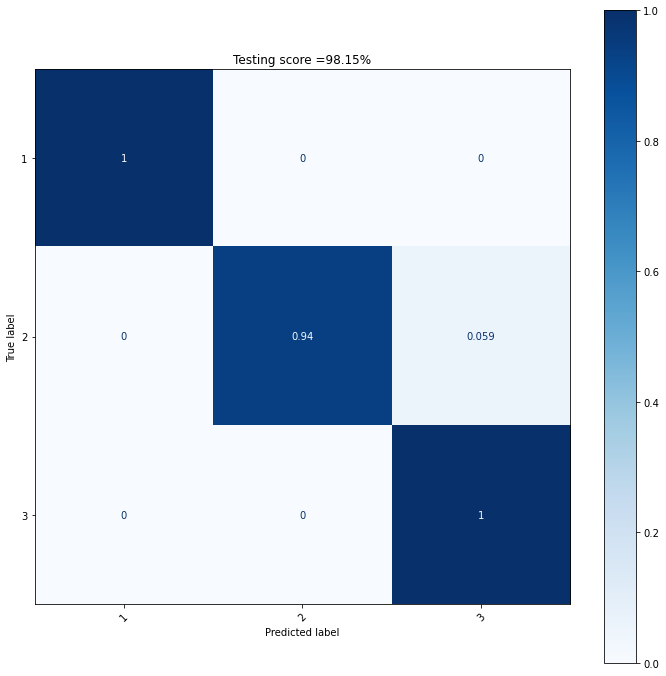

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12,12))
score = 100*clf_MLP.score(X_test, y_test)
title = 'Testing score ={:.2f}%'.format(score)

disp = ConfusionMatrixDisplay.from_estimator(
clf_MLP,
X_test,
y_test,
xticks_rotation=45, #'vertical',
# display_labels=class_names,
cmap=plt.cm.Blues,
normalize='true',
ax = ax
)

disp.ax_.set_title(title)
plt.show()